## Portfolio Optimization

Portfolio optimization is the process of creating a portfolio of assets, for which your investment has the maximum return and minimum risk.

#### _Portfolio_

An investor’s portfolio basically is his/her investment in different kinds of assets from different companies.

#### _Assets, Returns and Risk_

Assets are of various kinds. An asset is what you would purchase if you want to invest in a company.

These include, but are not limited to:

- Bonds
- Stocks
- Cash
- Real Estate

Usually when you build a portfolio, it is advisable to diversify your assets, or purchase different kinds of assets from different companies. For all assets, you will get a profit after a specified period of time. However, the profit may not be the same for each investment you make.

This profit is what we call returns.

But what if the company whose stocks you have purchased goes bankrupt?

This will lead to its stocks crashing in the share market and instead of gaining profits, you will also lose your capital investment.

This is what is called risk of investment.

Another aspect of risk is the fluctuations in the asset value. For certain assets, its value is highly volatile, that is, the value increases when the market goes up, and drops accordingly. Whereas certain other assets, like bonds and certain steady stocks, are relatively more resistant to market conditions, but may give lesser returns compared to high risk ones.

A good portfolio is one which gives us maximum return on our investment for minimum risk.

#### _Modern Portfolio Theory_

Modern Portfolio Theory, or also known as mean-variance analysis is a mathematical process which allows the user to maximize returns for a given risk level.

It was formulated by H. Markowitz.

MPT assumes that all investors are risk-averse, i.e, if there is a choice between low risk and high risk portfolios with the same returns, an investor will choose one with the low risk.

MPT encourages diversification of assets. It says that a high variance asset A if combined with diverse assets B and C, where A, B and C have little to no correlation, can give us a portfolio with low variance on returns.

#### _Efficient Frontier_

Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows the set of optimal portfolios that offer the highest expected return for a given risk level or the lowest risk for a given level of expected return.

#### Example

In [1]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

Step 1: Pull the stock price data

In [2]:
# Read Data
test = data.DataReader(['TSLA', 'FB'], 'yahoo', start='2018/01/01', end='2019/12/31')
test.head()

Attributes  Adj Close                  Close                   High  \
Symbols          TSLA          FB       TSLA          FB       TSLA   
Date                                                                  
2018-01-02  64.106003  181.419998  64.106003  181.419998  64.421997   
2018-01-03  63.450001  184.669998  63.450001  184.669998  65.050003   
2018-01-04  62.924000  184.330002  62.924000  184.330002  63.709999   
2018-01-05  63.316002  186.850006  63.316002  186.850006  63.448002   
2018-01-08  67.281998  188.279999  67.281998  188.279999  67.403999   

Attributes                    Low                   Open              \
Symbols             FB       TSLA          FB       TSLA          FB   
Date                                                                   
2018-01-02  181.580002  62.200001  177.550003  62.400002  177.679993   
2018-01-03  184.779999  63.110001  181.330002  64.199997  181.880005   
2018-01-04  186.210007  61.136002  184.100006  62.574001  184.899994   
2018-01-05  186.899994  62.400002  184.929993  63.324001  185.589996   
2018-01-08  188.899994  63.099998  186.330002  63.200001  187.199997   

Attributes    Volume            
Symbols         TSLA        FB  
Date                            
2018-01-02  21761000  18151900  
2018-01-03  22607500  16886600  
2018-01-04  49731500  13880900  
2018-01-05  22956000  13574500  
2018-01-08  49297000  17994700

The column 'Adj Close' gives us the closing price of company’s stock on the given day.

In [3]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,TSLA,FB
Date,,
2018-01-02,64.106003,181.419998
2018-01-03,63.450001,184.669998
2018-01-04,62.924000,184.330002
2018-01-05,63.316002,186.850006
2018-01-08,67.281998,188.279999


Step 2: Calculate percentage change in stock prices

Next, we calculate the percentage change in stock prices of tesla everyday. You will notice that that we take the log of percentage change.

But take log?

The reason for this is that log of the returns is time additive.

That is,
If r13 is the returns for time between t3 and t1.
r12 is the returns between t1 and t2 and
r23 is the returns between t2 and t3.

Then, log(r13) = log(r12) + log(r23)

For example:,
If p1 = 100, p2 = 110 and p3 = 120,
where p1 is price of stock in time 1

Then:

log(r12) = ln(p2/p1) = ln(110/100) = 9.53%,

log(r23) = ln(120/110) = 8.7% and

log(r13) = log(r12) + log(r23) = 9.53 + 8.7 = 18.23%, which is same as ln(120/100).

This means a log change of +0.1 today and then -0.1 tomorrow will give you the same value of stock as yesterday. This is not true if you simply compute percentage change.

It is common practice in portfolio optimization to take log of returns for calculations of covariance and correlation.

In [4]:
# Log of percentage change
tesla = test['TSLA'].pct_change().apply(lambda x: np.log(1+x))
tesla.head()

Date
2018-01-02         NaN
2018-01-03   -0.010286
2018-01-04   -0.008325
2018-01-05    0.006210
2018-01-08    0.060755
Name: TSLA, dtype: float64

_Variance_

The variance in prices of stocks of Tesla are an important indicator of how volatile this investment will be (how returns can fluctuate).

In [5]:
# Variance
var_tesla = tesla.var()
var_tesla

0.0011483734269334606

In [6]:
# Log of Percentage change for Facebook
fb = test['FB'].pct_change().apply(lambda x: np.log(1+x))
fb.head()

Date
2018-01-02         NaN
2018-01-03    0.017756
2018-01-04   -0.001843
2018-01-05    0.013579
2018-01-08    0.007624
Name: FB, dtype: float64

In [7]:
# Variance
var_fb = fb.var()
var_fb

0.0004569725841702254

_Volatility_

Volatility is measured as the standard deviation of a company’s stock.

If you carefully look at the formula for standard deviation, you will understand that it is just the square root of variance.

But volatility for the annual standard deviation. What we get from square root of variance is the daily standard deviation. To convert it to annual standard deviation we multiply the variance by 250.

250 is used because there are 250 trading days in a year.

In [8]:
# Volatility
tesla_vol = np.sqrt(var_tesla * 250)
fb_vol = np.sqrt(var_fb * 250)
tesla_vol, fb_vol

(0.5358109337568292, 0.33799873674698305)

<AxesSubplot:xlabel='Symbols'>

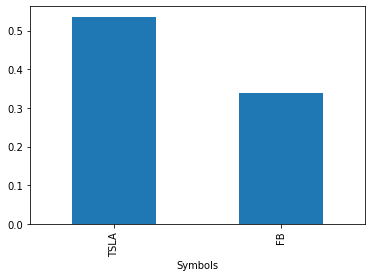

In [9]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

_Covariance_

Covariance measures the directional relationship between the returns on two assets.

A positive covariance means that returns of the two assets move together while a negative covariance means they move inversely. Risk and volatility can be reduced in a portfolio by pairing assets that have a negative covariance.

In [10]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


In [11]:
# Covariance
test1['TSLA'].cov(test1['FB'])

0.0001826162315603096

Small positive covariance between Tesla and Facebook.

_Correlation_

Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other.

A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.

A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.

A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [12]:
test1['TSLA'].corr(test1['FB'])

0.2520883272466129

In line with the covariance, the correlation between Tesla and Facebook is also positive.

_Expected Returns_

Expected returns of an asset are simply the mean of percentage change in its stock prices. So, the value of expected return we obtain here are daily expected returns.

For expected returns, you need to define weights for the assets choosen.

In simpler terms, this means you need to decide what percentage of your total money to you want to hold in each company’s stock.

Usually this decision is done by using the optimization techniques we will discuss later but for now we will consider random weights for Tesla and Facebook.

In [13]:
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,TSLA,FB
Date,,
2018-01-02,NaN,NaN
2018-01-03,-0.010286,0.017756
2018-01-04,-0.008325,-0.001843
2018-01-05,0.006210,0.013579
2018-01-08,0.060755,0.007624


Let’s define an array of random weights for the purpose of calculation. These weights will represent the percentage allocation of investments between these two stocks. They must add up to 1.

So, the problem of portfolio optimization is nothing but to find the optimal values of weights that maximizes expected returns while minimizing the risk (standard deviation).

In [14]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
TSLA    0.000530
FB      0.000246
dtype: float64

The total expected return for a portfolio is given by:

$E(R_p) = w_1 E(R_1) + w_2 E(R_2) + ... w_n E(R_n)$

Thus, e_r, or total expected return can be calculated as:

In [15]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.00030276915241011175

#### Example 2

We will be using stocks from 4 companies, namely, Apple, Nike, Google and Amazon for a period of 5 years.

In [16]:
# Import data
df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        NKE       GOOGL        AMZN       AAPL   
Date                                                                  
2015-01-02  24.678249  44.005409  529.549988  308.519989  27.332500   
2015-01-05  23.983027  43.296909  519.460022  302.190002  26.562500   
2015-01-06  23.985287  43.042221  506.640015  295.290009  26.565001   
2015-01-07  24.321608  43.931316  505.149994  298.420013  26.937500   
2015-01-08  25.256098  44.945435  506.910004  300.459991  27.972500   

Attributes                                          High             ...  \
Symbols           NKE       GOOGL        AMZN       AAPL        NKE  ...   
Date                                                                 ...   
2015-01-02  47.514999  529.549988  308.519989  27.860001  48.474998  ...   
2015-01-05  46.750000  519.460022  302.190002  27.162500  47.275002  ...   
2015-01-06  46.474998  506.640015  295.290009  26.857500  47.075001  ...   
2015-01-07  47.435001  505.149994  298.420013  27.049999  47.650002  ...   
2015-01-08  48.529999  506.910004  300.459991  28.037500  48.549999  ...   

Attributes         Low                   Open                         \
Symbols          GOOGL        AMZN       AAPL        NKE       GOOGL   
Date                                                                   
2015-01-02  527.880005  306.959991  27.847500  48.275002  532.599976   
2015-01-05  517.750000  300.850006  27.072500  47.255001  527.150024   
2015-01-06  505.549988  292.380005  26.635000  46.945000  520.500000   
2015-01-07  503.649994  295.329987  26.799999  46.805000  510.950012   
2015-01-08  495.019989  296.109985  27.307501  47.830002  501.510010   

Attributes                   Volume                                   
Symbols           AMZN         AAPL        NKE      GOOGL       AMZN  
Date                                                                  
2015-01-02  312.579987  212818400.0  4985800.0  1324000.0  2783200.0  
2015-01-05  307.010010  257142000.0  6889200.0  2059100.0  2774200.0  
2015-01-06  302.239990  263188400.0  7576000.0  2722800.0  3519000.0  
2015-01-07  297.500000  160423600.0  7256000.0  2345900.0  2640300.0  
2015-01-08  300.320007  237458000.0  5978200.0  3652700.0  3088400.0  

[5 rows x 24 columns]

In [17]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,AAPL,NKE,GOOGL,AMZN
Date,,,,
2015-01-02,24.678249,44.005409,529.549988,308.519989
2015-01-05,23.983027,43.296909,519.460022,302.190002
2015-01-06,23.985287,43.042221,506.640015,295.290009
2015-01-07,24.321608,43.931316,505.149994,298.420013
2015-01-08,25.256098,44.945435,506.910004,300.459991


The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other.

In [18]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,0.000246,0.000084,0.000122,0.000142
NKE,0.000084,0.000219,0.000085,0.000092
GOOGL,0.000122,0.000085,0.000221,0.000176
AMZN,0.000142,0.000092,0.000176,0.000333


In [19]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN
Symbols,,,,
AAPL,1.000000,0.360910,0.524818,0.496610
NKE,0.360910,1.000000,0.387435,0.341530
GOOGL,0.524818,0.387435,1.000000,0.647942
AMZN,0.496610,0.341530,0.647942,1.000000


The formula for calculating portfolio variance differs from the usual formula of variance. It looks like this:

$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j)$

Here, wi and wj denote weights of all assets from 1 to n (in our case from 1 to 4) and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all 4 assets. Remember that sum of weights should always be 1.

In [20]:
# Randomly weighted portfolio's variance
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.00016079369787620838

The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

We use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns.

In [21]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.361281
NKE      0.162404
GOOGL    0.155401
AMZN     0.295903
dtype: float64

In [22]:
# Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.20549014023129264

In [23]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.247789
NKE      0.233831
GOOGL    0.235281
AMZN     0.288655
dtype: float64

In [24]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


Amazon has the maximum risk attached but it also offers the maximum returns. Apple lies somewhere in the middle, with average risk and return rates.

to plot the graph of efficient frontier, we need run a loop. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

We run this loop a 1000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.

In [25]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [26]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [27]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [28]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight
0,0.248692,0.220900,0.115221,0.104949,0.289913,0.489917
1,0.272383,0.218318,0.307105,0.006403,0.304220,0.382272
2,0.254878,0.196510,0.336915,0.177417,0.280184,0.205484
3,0.239766,0.194916,0.193948,0.340584,0.166189,0.299279
4,0.225868,0.191834,0.217857,0.538919,0.087776,0.155447


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

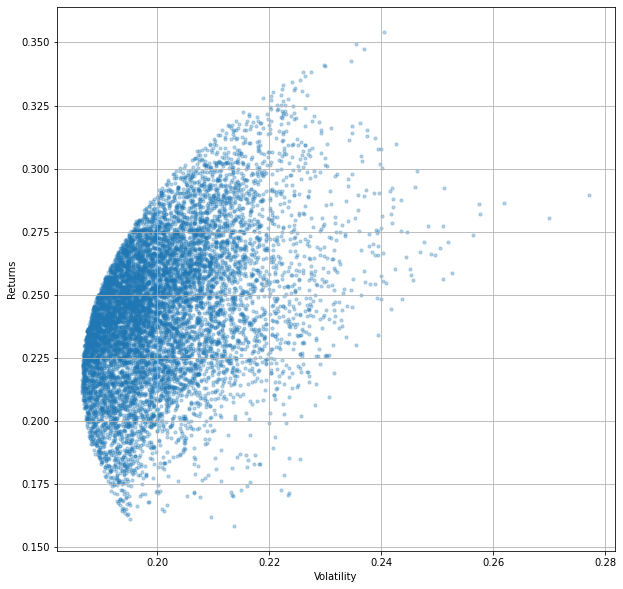

In [29]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

    Minimum volatility (left most point)
    Maximum returns (top most point)

And everything in between.

In [30]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.212319
Volatility      0.186554
AAPL weight     0.242891
NKE weight      0.418243
GOOGL weight    0.310521
AMZN weight     0.028344
Name: 1234, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

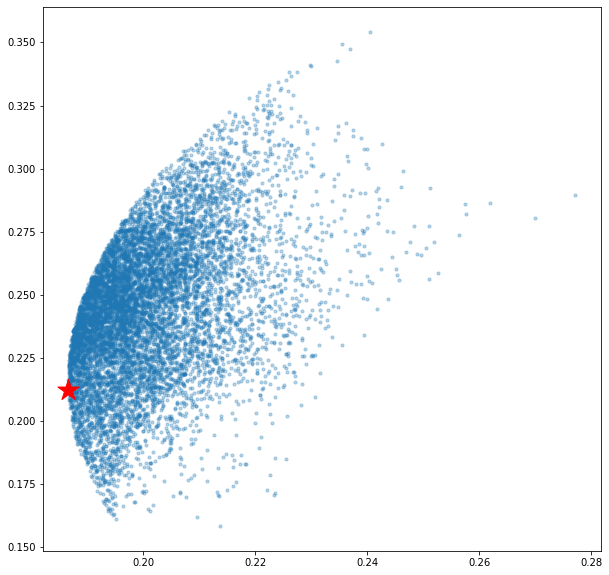

In [31]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter called the Sharpe Ratio.

_Sharpe Ratio_

The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio. The formula for this ratio is:

Sharpe Ratio = $ \frac{R_p - R_f}{\sigma_p}$

where:
- $R_p$ = return of portfolio
- $R_f$ = risk-free rate
- $\sigma_p$ = standard deviation of the portfolio

Below, we define the risk-free rate to be 1% or 0.01.

#### _Optimal Risky Portfolio_

An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

In [32]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.327973
Volatility      0.218824
AAPL weight     0.730199
NKE weight      0.107544
GOOGL weight    0.009334
AMZN weight     0.152922
Name: 6366, dtype: float64

You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.

We can plot this point too on the graph of efficient frontier.

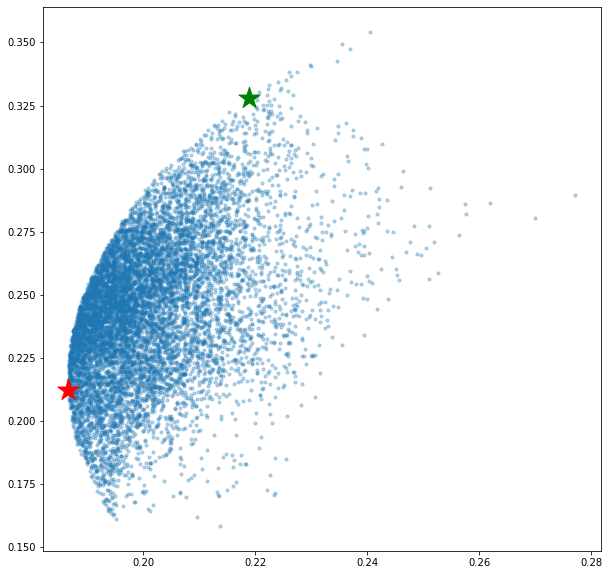

In [33]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

---

References:

- https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/